In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_circles

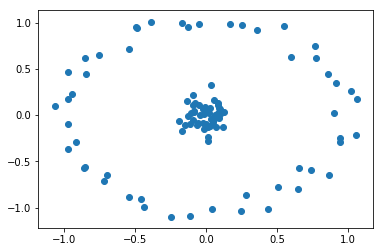

In [2]:
X, clusters = make_circles(n_samples=100, noise=.06, factor=.1)
plt.scatter(X[:,0], X[:,1])

In [3]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [4]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

C:\Users\jkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


[[0 1 0 ... 1 0 1]
 [1 0 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


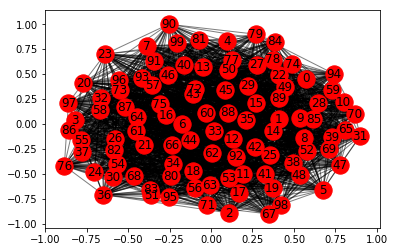

In [5]:
G = nx.random_graphs.erdos_renyi_graph(X.shape[0], 0.5)
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [6]:
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[46  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  0 46  0]
 [ 0  0  0 ...  0  0 44]]
laplacian matrix:
[[46 -1  0 ... -1  0 -1]
 [-1 50 -1 ... -1  0  0]
 [ 0 -1 52 ...  0  0  0]
 ...
 [-1 -1  0 ... 48 -1  0]
 [ 0  0  0 ... -1 46  0]
 [-1  0  0 ...  0  0 44]]


In [7]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[7.27879908e-15 6.49980563e+01 3.75290162e+01 3.84084805e+01
 6.36283433e+01 3.89991319e+01 6.30685950e+01 6.27682580e+01
 3.94525922e+01 6.17078780e+01 6.15238238e+01 6.10197102e+01
 3.98618922e+01 4.00217597e+01 6.04756845e+01 6.01974597e+01
 4.02349116e+01 4.04310756e+01 6.00872658e+01 5.99872702e+01
 4.09932432e+01 4.10416933e+01 5.94932667e+01 5.90146841e+01
 5.87607938e+01 4.17097097e+01 4.16063840e+01 4.19385181e+01
 4.20740946e+01 5.83057499e+01 5.82189399e+01 5.77665926e+01
 5.74891089e+01 4.26215050e+01 4.29715935e+01 4.30779203e+01
 5.73343665e+01 4.33121473e+01 5.72044671e+01 4.34135519e+01
 4.36800492e+01 4.38832630e+01 5.67794295e+01 5.65257153e+01
 5.63802395e+01 4.42550741e+01 5.62059305e+01 4.47001718e+01
 4.47849191e+01 5.59786425e+01 5.57816586e+01 5.55391644e+01
 4.50102449e+01 4.52412429e+01 5.52869413e+01 4.55480239e+01
 5.48743168e+01 5.46689267e+01 4.59403778e+01 4.60075186e+01
 5.44621644e+01 4.62058985e+01 5.43870746e+01 5.43385554e+01
 5.40775605

In [8]:
i = np.where(e < 0.5)[0]
U = np.array(v[:, i])
km = KMeans(init='k-means++', n_clusters=2 , max_iter=500, tol=0.00001)
km.fit(U)
km.labels_

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

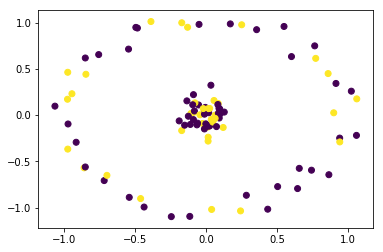

In [9]:
plt.scatter(X[:,0],X[:,1], c=km.labels_ )